# Decision Modeling Binary Relations Practical Work

1. For all the questions below, the binary relation is represented by a matrix given in an Excel file (.xls or .xlsx).
- You could implement a Python function converting this file to a .csv file.
- You could implement a Python function showing a graphical representation of this matrix by using appropriate libraries like networkx and matplotlib.

In [59]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def xlsx_to_csv(file_name):
    data_xlsx = pd.read_excel(file_name, index_col=0)
    data_xlsx.to_csv(file_name[:-4]+"csv", encoding="utf-8")

class BinaryRelationsMatrix():

    def __init__(self, matrix):
        self.matrix = matrix

    def show_graph(self):
        np_matrix = np.matrix(self.matrix)
        graph = nx.from_numpy_matrix(np_matrix)
        nx.draw(graph)
        plt.show()

    def is_reflexive(self):
        '''
        if for every x ∈ X, x R x;
        :return: True
        '''
        n = len(self.matrix)
        for i in range(n):
            if not self.matrix[i][i]:
                return False
        return True

    def is_irreflexive(self):
        '''
        if for every x ∈ X, not(x R x)
        :return: True
        '''
        n = len(self.matrix)
        for i in range(n):
            if self.matrix[i][i]:
                return False
        return True

    def is_complete(self):
        '''
        if for every x, y ∈ X, x R y or y R x (possibly both);
        :return: True
        '''
        n = len(self.matrix)
        for i in range(n):
            for j in range(n):
                if not (self.matrix[i][j] or self.matrix[j][i]):
                    return False
        return True

    # AsymmetricCheck
    def is_asymmetric(self):
        '''
        if for every x, y ∈ X, [x R y ⇒ not(y R x)];
        :return: True
        '''
        n = len(self.matrix)
        for i in range(n):
            for j in range(n):
                if self.matrix[i][j]:
                    if not (not self.matrix[j][i]):
                        return False
        return True

    # SymmetricCheck
    def is_symmetric(self):
        '''
        if for every x, y ∈ X, [x R y ⇒ y R x];
        :return: True
        '''
        n = len(self.matrix)
        for i in range(n):
            for j in range(n):
                if self.matrix[i][j]:
                    if not self.matrix[j][i]:
                        return False
        return True

    # AntisymmetricCheck
    def is_antisymmetric(self):
        """
        if for every x, y ∈ X, [x R y and y R x =⇒ x = y];
        :return: Ture
        """
        n = len(self.matrix)
        for i in range(n):
            for j in range(n):
                if self.matrix[i][j] and self.matrix[j][i]:
                    if not i == j:
                        return False
        return True

    # TransitiveCheck
    def is_transitive(self):
        """
        if for every x, y, z ∈ X, [x R y and y R z =⇒ x R z];
        :return: True
        """
        n = len(self.matrix)
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    if self.matrix[i][j] and self.matrix[j][k]:
                        if not self.matrix[i][k]:
                            return False
        return True

    # NegativetransitiveCheck

    def is_negative_transitive(self):
        """
        if for every x, y, z ∈ X, [not(x R y) and not(y R z) =⇒ not(x R z)];
        :return: True
        """
        n = len(self.matrix)
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    if (not self.matrix[i][j]) and (not self.matrix[j][k]):
                        if not (not self.matrix[i][k]):
                            return False
        return True

    # CompleteOrderCheck
    def is_complete_order(self):
        """
        A binary relation R on X is a total order or a linear order if R is complete, antisymmetric and transitive.
        :return:
        """
        return self.is_complete() and self.is_antisymmetric() and self.is_transitive()

    # CompletePreOrderCheck
    def is_complete_preorder(self):
        """
        A binary relation R on X is a weak order or a complete preorder if R is complete and transitive.
        """
        return self.is_complete() and self.is_transitive()

    # Preorder
    def is_preorder(self):
        """
        A binary relation R on X is a preorder if R is reflexive and transitive.
        :return: True
        """
        return self.is_reflexive() and self.is_transitive()

    def is_equivalence_relation(self):
        """
        A binary relation R on X that is reflexive, symmetric and transitive is called an equivalence relation.
        :return: True
        """
        return self.is_reflexive() and self.is_symmetric() and self.is_transitive()

    # StrictRelation

    def get_strict_relation(self):
        """
        For a binary relation R on X, we define a symmetric part I and an asymmetric
        part P as follows: for all x, y ∈ X
        x I y if [x R y and y R x]
        x P y if [x R y and not(y R x)]
        :return: n * n Matrix
        """
        n = len(self.matrix)
        strict_part = [[False for _ in range(n)] for _ in range(n)]
        for i in range(n):
            for j in range(n):
                if  self.matrix[i][j] and self.matrix[j][i]:
                    strict_part[i][j] = True
                else:
                    strict_part[i][j] = False
        return strict_part

    # IndifferenceRelation
    def get_indifference_relation(self):
        """
        For a binary relation R on X, we define a symmetric part I and an asymmetric
        part P as follows: for all x, y ∈ X
        x I y if [x R y and y R x]
        x P y if [x R y and not(y R x)]
        :return: n * n Matrix
        """
        n = len(self.matrix)
        indifference_part = [[False for _ in range(n)] for _ in range(n)]
        for i in range(n):
            for j in range(n):
                if self.matrix[i][j] and not (self.matrix[j][i]):
                    indifference_part[i][j] = True
                else:
                    indifference_part[i][j] = False
        return indifference_part

    # Indegree
    def get_indegree(self, i):
        indegree = 0
        n = len(self.matrix)
        for j in range(n):
            if self.matrix[j][i] == True:
                indegree = indegree + 1
        return indegree

    # Topologicalsorting
    def topological_sort(self):
        """
        Topological sorting for Directed Acyclic Graph (DAG) is a linear ordering of
        vertices such that for every directed edge uv, vertex u comes before v in the
        ordering.
        Topological Sorting for a graph is not possible if the graph is not a DAG.
        :return:
        """
        n = len(self.matrix)
        graph = [[] for _ in range(n)]
        indegree = [0] * n
        for i in range(n):
            for j in range(n):
                if matrix[j][i] == True:
                    indegree[i] = indegree[i] + 1
        queue = []
        count = 0
        for k in range(n):
            if indegree[k] == 0:
                queue.append(k)

        while queue:
            v = queue.pop(0)
            count = count + 1
            for w in matrix[v]:
                indegree[w] = indegree[w] - 1
                if indegree[w] == 0:
                    queue.append(w)

        if count == n:
            return queue
        else:
            print("Not DAG!")
            return None



Test converting function

In [60]:
xlsx_to_csv("DeMTest.xlsx")

Test graph function

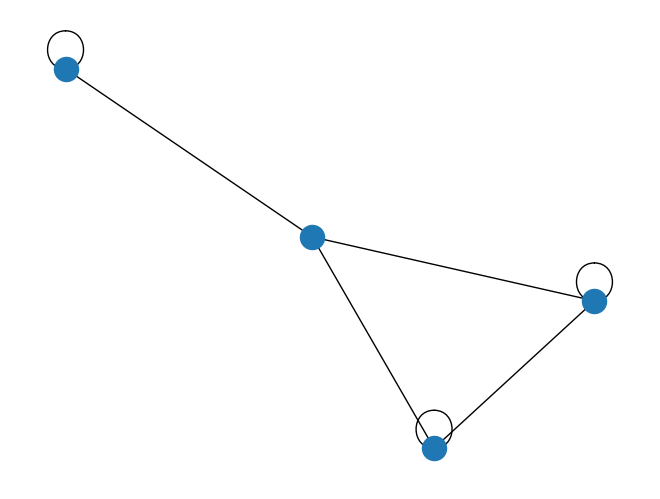

In [61]:
matrix = np.loadtxt("DeMTest.csv", delimiter=",", skiprows=0)
matrix = np.array(matrix, dtype=bool)
test1 = BinaryRelationsMatrix(matrix)
test1.show_graph()

2. Build a Python function CompleteCheck testing if a binary relation is complete.

In [62]:
test1.is_complete()

False

3. Build a Python function ReflexiveCheck testing if a binary relation is reflexive.

In [63]:
test1.is_reflexive()

False

4. Build a Python function AsymmetricCheck testing if a binary relation is asymmetric.

In [64]:
test1.is_asymmetric()

False

5. Build a Python function SymmetricCheck testing if a binary relation is symmetric.

In [65]:
test1.is_symmetric()

False

6. Build a Python function AntisymmetricCheck testing if a binary relation is antisymmetric.

In [66]:
test1.is_antisymmetric()

False

7. Build a Python function TransitiveCheck testing if a binary relation is transitive.

In [67]:
test1.is_transitive()

False

8. Build a Python function NegativetransitiveCheck testing if a binary relation is negativetransitive.

In [68]:
test1.is_negative_transitive()

False

9. Build a Python function CompleteOrderCheck testing if a binary relation is a complete order

In [69]:
test1.is_complete_order()

False

10. Build a Python function CompletePreOrderCheck testing if a binary relation is a complete pre-order.

In [70]:
test1.is_complete_preorder()

False

11. Build a Python function StrictRelation returning the strict relation part of a binary relation

In [71]:
test1.get_strict_relation()

[[False, False, True, True],
 [False, True, False, False],
 [True, False, True, False],
 [True, False, False, True]]

12. Build a Python function IndifferenceRelation returning the indifference relation part of a binary relation.

In [72]:
test1.get_indifference_relation()

[[False, True, False, False],
 [False, False, False, True],
 [False, False, False, False],
 [False, False, False, False]]

13. Build a Python function Topologicalsorting returning a topological sorting of a binary relation.

In [73]:
test1.topological_sort()

Not DAG!
